In [221]:
import numpy as np

In [222]:
%store -r ionosphere_export
%store -r adult_export
%store -r thoracic_export
%store -r credit_export

%store -r ionosphere_headers
%store -r adult_headers
%store -r thoracic_headers
%store -r credit_headers

In [223]:
'''
Splits to train+validation and test based on train_validation_percent.
'''
def train_test_split(datasets, train_validation_percent):
    train_test_split = {}
    train_test_split['train_and_validation'] = {}
    train_test_split['test'] = {}
    for dataset_name, dataset in datasets.items():
        shuffled_dataset = dataset[0]
        np.random.shuffle(shuffled_dataset)
        
        
        length = len(shuffled_dataset)
        train_length = int(length*train_validation_percent)
        
        train_test_split['train_and_validation'][dataset_name] = []
        
        # TRAIN _AND _VALIDATION holds datasets dict with [data, headers] for each
        train_test_split['train_and_validation'][dataset_name].append(shuffled_dataset[:train_length])
        train_test_split['train_and_validation'][dataset_name].append(dataset[1])
        
        # SET ASIDE TEST holds the testing data only
        train_test_split['test'][dataset_name] = shuffled_dataset[train_length:]

        
    return train_test_split

In [224]:
datasets = {
    "ionosphere": [ionosphere_export,ionosphere_headers],
    "adult": [adult_export,adult_headers],
    "thoracic_surgery": [thoracic_export,thoracic_headers],
    "credit_card": [credit_export,credit_headers]
}

In [225]:
'''
85% train + validation
15% test
'''
split_data = train_test_split(datasets,0.85)

'''
Set train_val variable for tests
'''
train_val = split_data['train_and_validation']

In [226]:
'''
Runs k-fold test on a datasets dict key is dataset_name and value is [data, headers].
'''
def run_cross_validations(datasets, k, use_lr=True,use_nb=True,use_nb_log=True,model_args=[]):
    results = {}
    for name,dataset in datasets.items():
        print(name, "-----")
        print("\tRunning k_fold on: ",name)
        
        naive_results = None
        logistic_results = None
        
        if(use_lr):
            print("\tRunning Logistic Regression")
            print()
            logistic_results = k_fold_cross_validation(k,dataset[0], "LogisticRegression",[],model_args)
            print()
            print("\t\tAccuracy: ",logistic_results)
            print()
        if(use_nb):
            print()
            print("\tRunning Naive Bayes Non-Log")
            print()
            naive_results = k_fold_cross_validation(k,dataset[0], "NaiveBayes",dataset[1],[False])
            print()
            print("\t\tAccuracy: ",naive_results)
            print()
        if(use_nb):
            print()
            print("\tRunning Naive Bayes Log Laplace")
            print()
            naive_results = k_fold_cross_validation(k,dataset[0], "NaiveBayesLog",dataset[1],[True])
            print()
            print("\t\tAccuracy: ",naive_results)
            print()

        results[name] = [logistic_results,naive_results]
    return results

In [237]:
%run validation.ipynb

In [219]:
'''
Test #1: Epsilon Tests with value of 0.1,0.01,0.001 @ 0.1 learning rate

Type: 5-fold for each.
'''
%run epsilon_tests.ipynb

Running with epsilon value of  0.1
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0014           0.0016           0.0013
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0015           0.0016           0.0013

		Accuracy:  0.8116384180790959

Running with epsilon value of  0.01
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0541           0.0625           0.0448
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0541           0.0626           0.0448

		Accuracy:  0.8457062146892655

Running with epsilon value of  0.001
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

Terminating early, 10k iterations reached.
Terminating early, 10k iterations reached.
Termi

In [220]:
'''
Test #2: Different set termination values 1000,5000,10000 @ 0.1 learning rate

Type: 5-fold for each.
'''
%run termination_tests.ipynb

Running with termination value of  1000
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0146           0.0152           0.0144
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0146           0.0153           0.0144

		Accuracy:  0.8490960451977401

adult -----
	Running k_fold on:  adult
	Running Logistic Regression



KeyboardInterrupt: 

In [159]:
'''
Test #3: Different learning rates set termination value of 10,000 at 0.01, 0.05, 0.1, 0.2 and 0.3

Type: 5-fold for each.
'''
%run learning_rate_tests.ipynb

Running with learning rate of  0.01
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1489           0.1663           0.1435
1  Predict           0.0000           0.0000           0.0000
2    Total           0.1489           0.1664           0.1436

		Accuracy:  0.8689265536723163

adult -----
	Running k_fold on:  adult
	Running Logistic Regression



KeyboardInterrupt: 

In [228]:
'''
Note: Found from running find_optimal_features to get highest 5 accuracies for each dataset.
'''
best_features = {
    'ionosphere': ['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g'],
    'adult': ['capitalgain_g','educationnum_g','capitalloss_g','education','relationship'],
    'thoracic_surgery': ['asthma','mi_up_to_6_months','pain','type_2_diabetes','dyspnoea'],
    'credit_card': ['PAY_0', 'PAY_2', 'PAY_5', 'PAY_3', 'PAY_4']
}

In [229]:
'''
Returns dictionary with key as a feature and the index of all the columns
'''
def separate_by_feature(dataset_headers):
    dataset_headers = dataset_headers[:-1]
    feature_map = {}
    
    for i, feature in enumerate(dataset_headers):
        sep = '_b'
        feature_name = feature.split(sep, 1)[0]
        if feature_name not in feature_map:
            feature_map[feature_name] = [i]
        else:
            feature_map[feature_name].append(i)
    return feature_map

In [230]:
'''
Test #4: Run logistic tests on best features to see if outliers are causing issues.

Type: K-fold tests like before on reduced dataset
'''
# Save the old train_val for future tests.
train_val_full = train_val

# Save new train_val with only the features needed.
train_val_new = {}

# Set new train val to be only the good features.
for dataset_name, features in best_features.items():

    # Get all the appropriate columns for each feature. Passed in headers for dataset.
    feature_map = separate_by_feature(train_val[dataset_name][1])
        
    columns_to_get = []
    for feature in features:
        columns_to_get = columns_to_get + feature_map[feature]

    optimal_headers = train_val[dataset_name][1][columns_to_get]

#     results[dataset]['features'] = optimal_headers
    print("Running LR on the following features: ",features)
    
    columns_to_get.append(-1)

    dataset_to_run_on = train_val[dataset_name][0][:,columns_to_get]
    train_val_new[dataset_name] = []
    train_val_new[dataset_name].append(dataset_to_run_on)
    train_val_new[dataset_name].append(optimal_headers)
    
# Set to train_val to train_val_new
train_val = train_val_new

Running LR on the following features:  ['a6_g', 'a4_g', 'a2_g', 'a27_g', 'a8_g']
Running LR on the following features:  ['capitalgain_g', 'educationnum_g', 'capitalloss_g', 'education', 'relationship']
Running LR on the following features:  ['asthma', 'mi_up_to_6_months', 'pain', 'type_2_diabetes', 'dyspnoea']
Running LR on the following features:  ['PAY_0', 'PAY_2', 'PAY_5', 'PAY_3', 'PAY_4']


In [239]:
'''
Test #4 CONTINUED: Run logistic tests on best features to see if outliers are causing issues.

Type: K-fold tests like before on reduced dataset
'''
use_epsilons_test([1e-1,1e-2,1e-3],train_val)

Running with epsilon value of  0.1
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0007           0.0007           0.0006
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0007           0.0007           0.0006

		Accuracy:  0.7315819209039549

adult -----
	Running k_fold on:  adult
	Running Logistic Regression

Terminating early, 10k iterations reached.
Terminating early, 10k iterations reached.
Terminating early, 10k iterations reached.
Terminating early, 10k iterations reached.
Terminating early, 10k iterations reached.
      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit          14.4475          15.7864          12.8282
1  Predict           0.0008           0.0009           0.0007
2    Total          14.4482          15.7871          12.8289

		Accuracy:  0.8021493508981135

thoracic_surgery -----
	Running k_fold

In [232]:
'''
Test #4 CONTINUED: Run logistic tests on best features to see if outliers are causing issues.

Type: K-fold tests like before on reduced dataset
'''
%run termination_tests.ipynb

Running with termination value of  1000
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0127           0.0131           0.0124
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0127           0.0131           0.0124

		Accuracy:  0.8154237288135594

adult -----
	Running k_fold on:  adult
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           1.3356           1.4686           1.2247
1  Predict           0.0005           0.0006           0.0005
2    Total           1.3362           1.4691           1.2252

		Accuracy:  0.7956450049389437

thoracic_surgery -----
	Running k_fold on:  thoracic_surgery
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0158           0.0203           0.0140
1  Predict           0.0000      

In [238]:
'''
Test #4 CONTINUED: Run logistic tests on best features to see if outliers are causing issues.

Type: K-fold tests like before on reduced dataset
'''
%run learning_rate_tests.ipynb

Running with learning rate of  0.01
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1273           0.1293           0.1252
1  Predict           0.0000           0.0000           0.0000
2    Total           0.1273           0.1294           0.1253

		Accuracy:  0.8155367231638418

adult -----
	Running k_fold on:  adult
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit          12.7855          13.5778          12.2774
1  Predict           0.0006           0.0008           0.0005
2    Total          12.7862          13.5784          12.2781

		Accuracy:  0.7995470954042576

thoracic_surgery -----
	Running k_fold on:  thoracic_surgery
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1405           0.1472           0.1360
1  Predict           0.0000          

KeyboardInterrupt: 

In [240]:
train_val = train_val_full

In [241]:
'''
Found best features form analyzing above!
'''
best_logistic_model_args=[5000,0.1,False,1e-2]

RUNNING 5 FOLD ON EACH DATASET
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression



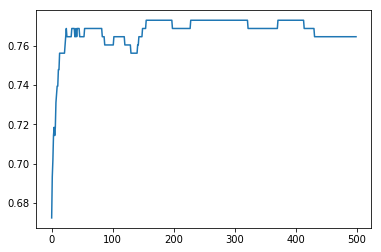

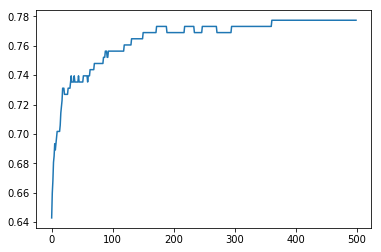

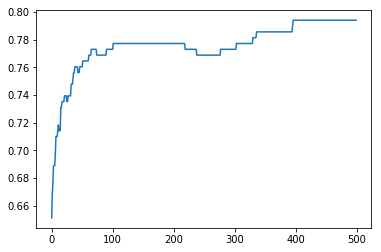

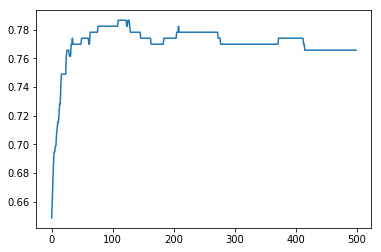

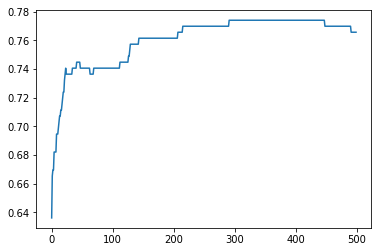

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1422           0.1645           0.1334
1  Predict           0.0001           0.0001           0.0001
2    Total           0.1423           0.1645           0.1335

		Accuracy:  0.8523728813559321


	Running Naive Bayes Non-Log

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0064           0.0069           0.0063
1  Predict           0.0045           0.0046           0.0043
2    Total           0.0109           0.0112           0.0108

		Accuracy:  0.8324858757062147


	Running Naive Bayes Log Laplace

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0129           0.0132           0.0127
1  Predict           0.0046           0.0047           0.0044
2    Total           0.0174           0.0179           0.0172

		Accuracy:  0.822090395480226

adult -----
	Running k_fold on:  adult
	Running Logistic Regression



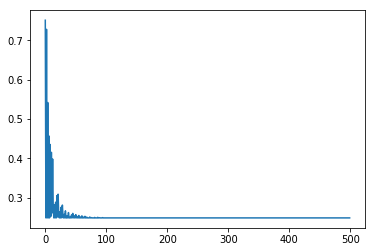

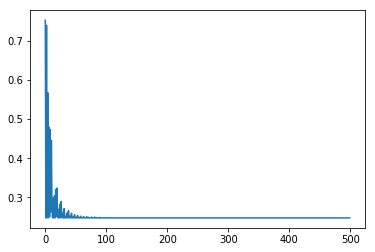

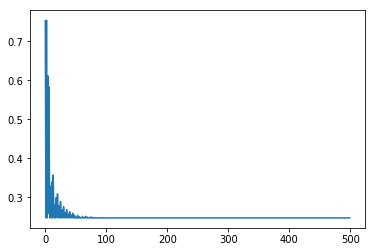

In [ ]:
'''
Test #4: K-fold test on 5, 10, 15 with best parameters on whole training set from **above**!
'''
%run k_fold_tests.ipynb
k_fold_tests([5,10,15])

In [ ]:
'''
Test #4: K-fold test on 5, 10, 15 with best parameters on GOOD FEATURES ONLY from **above**!
'''
train_val = train_val_new
%run k_fold_tests.ipynb
k_fold_tests([5,10,15])

In [ ]:
'''
Test #5: Splits Test, Trains on Percentage of Training Set and Prints accuracy from Test Set

Type: Test on test set.

GOOD FEATURES ONLY
'''
%run splits_tests.ipynb

In [ ]:
'''
Test #6: Equal Labels Test removes randomized samples to have equal labels for each dataset

Type: 5-fold for each.

GOOD FEATURES ONLY

'''
%run equal_labels_tests.ipynb

In [ ]:
'''
Test #7: Getting Optimal Features

Type: Predict on the test that we set aside for each feature.
'''

In [ ]:
'''
Final Test: 
    Eps Vs. Num_iter => Best: Num_iter 5000
    Best LR => Best: L.R 0.1
    Optimal Features!
    Best Split => Best: 
    Equal Labels => Best: NO
'''